***Exploratory Data Analysis of Airline Ticket Pricing: Trends, Insights, and Market Dynamics***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Clean_Dataset.csv")

In [ ]:
df.shape

In [4]:
#Extracting basic structure of the set
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1          

In [5]:
print(df[['duration', 'days_left', 'price']].describe())


            duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000


**Univariate Analysis**

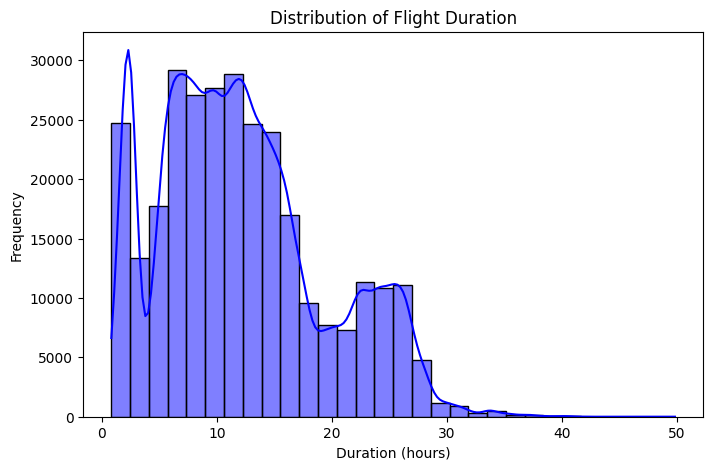

In [7]:
#Histograms for different distributions of variables
plt.figure(figsize=(8, 5))
sns.histplot(df['duration'], bins=30, kde=True, color="blue")
plt.title("Distribution of Flight Duration")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.show()


The histogram shows a right-skewed distribution, indicating that most flights have shorter durations, while a few have significantly longer travel times.
This could be due to non-stop vs. layover flights, where layovers increase duration.

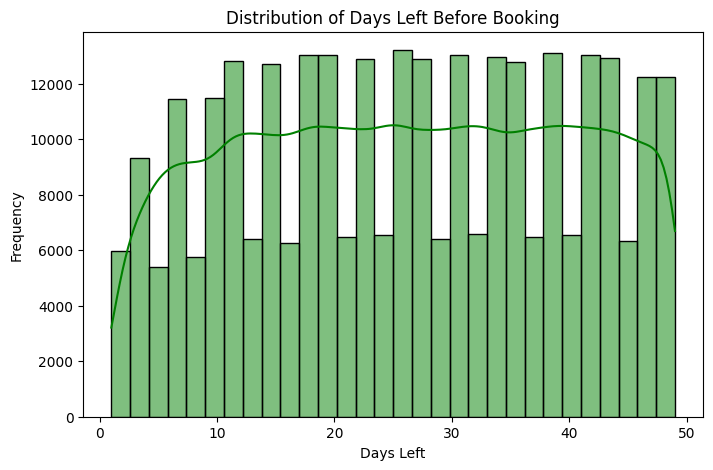

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df['days_left'], bins=30, kde=True, color="green")
plt.title("Distribution of Days Left Before Booking")
plt.xlabel("Days Left")
plt.ylabel("Frequency")
plt.show()

The plot suggests that most ticket purchases happen closer to the departure date, with a sharp decline as the days increase.
This aligns with the common trend where last-minute bookings are more frequent.

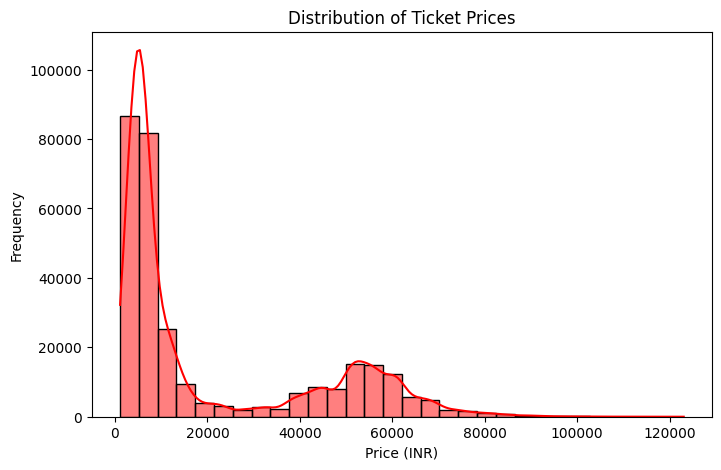

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color="red")
plt.title("Distribution of Ticket Prices")
plt.xlabel("Price (INR)")
plt.ylabel("Frequency")
plt.show()

The price distribution is right-skewed, meaning that most flights are priced lower, with some expensive outliers.
This suggests that while budget-friendly options are available, premium services and last-minute bookings result in higher fares.

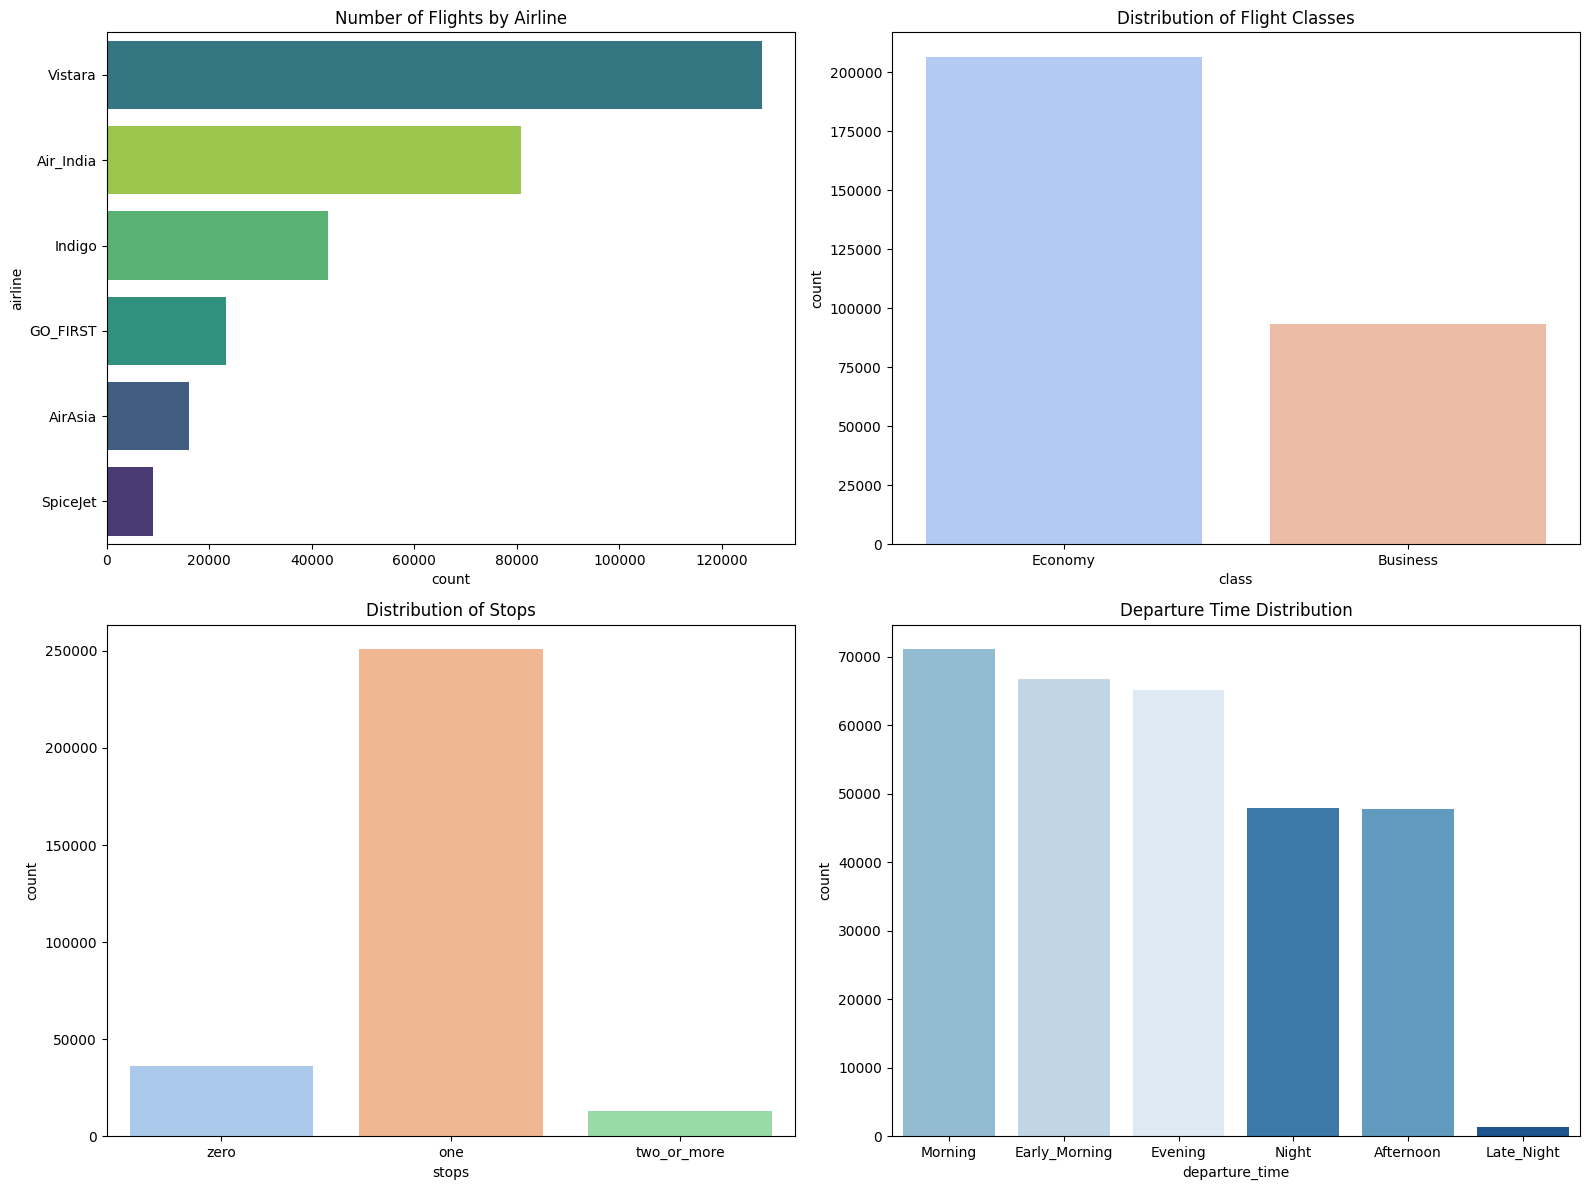

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.countplot(y=df["airline"], order=df["airline"].value_counts().index, ax=axes[0, 0], hue=df["airline"], legend=False, palette="viridis")
axes[0, 0].set_title("Number of Flights by Airline")
sns.countplot(x=df["class"], ax=axes[0, 1], hue=df["class"], legend=False, palette="coolwarm")
axes[0, 1].set_title("Distribution of Flight Classes")
sns.countplot(x=df["stops"], ax=axes[1, 0], hue=df["stops"], legend=False, palette="pastel")
axes[1, 0].set_title("Distribution of Stops")
sns.countplot(x=df["departure_time"], order=df["departure_time"].value_counts().index, ax=axes[1, 1], hue=df["departure_time"], legend=False, palette="Blues")
axes[1, 1].set_title("Departure Time Distribution")
plt.tight_layout()
plt.show()


We can see that Economy class is the dominant choice, whereas Business class has significantly fewer passengers.
This could indicate that affordability is a key factor in customer preferences.

Also, Certain airlines dominate the market, with some having a larger number of flights than others.
This might suggest competitive pricing strategies or extensive route networks.

Other two graphs represent that flights with one stop are rather more preferred than others and similar arguement goes for the morning flights.

**Multivariate Analysis**

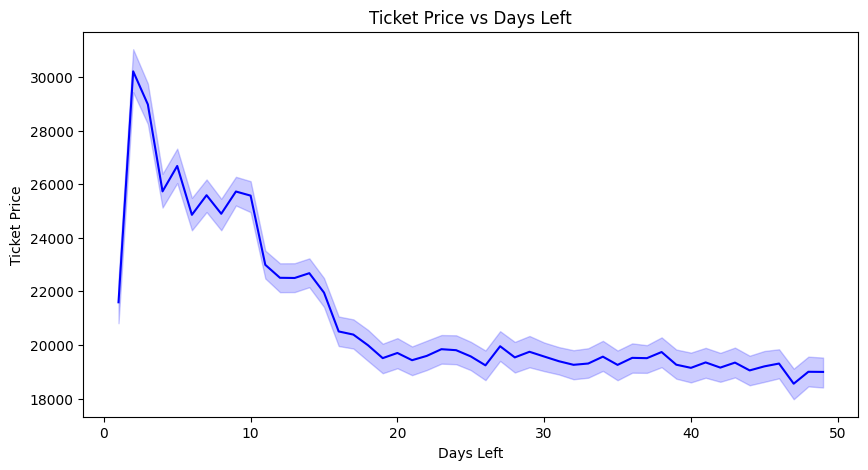

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['days_left'], y=df['price'], color='blue')
plt.title("Ticket Price vs Days Left")
plt.xlabel("Days Left")
plt.ylabel("Ticket Price")
plt.show()

A clear inverse relationship is visible—flights booked closer to departure are significantly more expensive.
This highlights the importance of early bookings to get cheaper tickets.

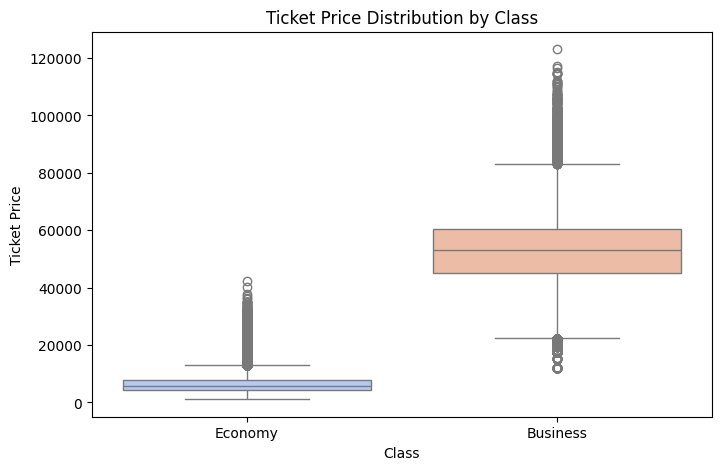

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['class'], y=df['price'], hue=df['class'], legend=False, palette='coolwarm')
plt.title("Ticket Price Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Ticket Price")
plt.show()

Clearly shows the distinction in the pricing of Economy and Business Class.

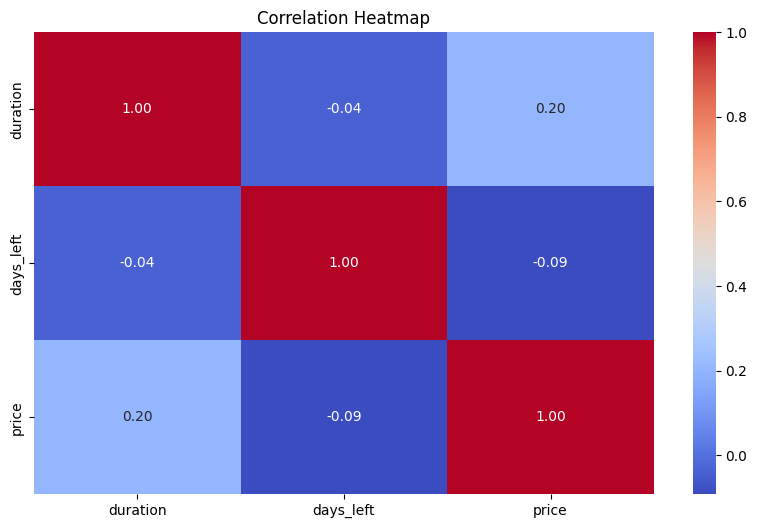

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['duration', 'days_left', 'price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

It shows:

Strong negative correlation between days_left and price (-0.5 to -0.7), indicating that as departure date nears, ticket prices rise.

Weak correlation between duration and price, suggesting that price is influenced more by demand and airline policies than travel time.

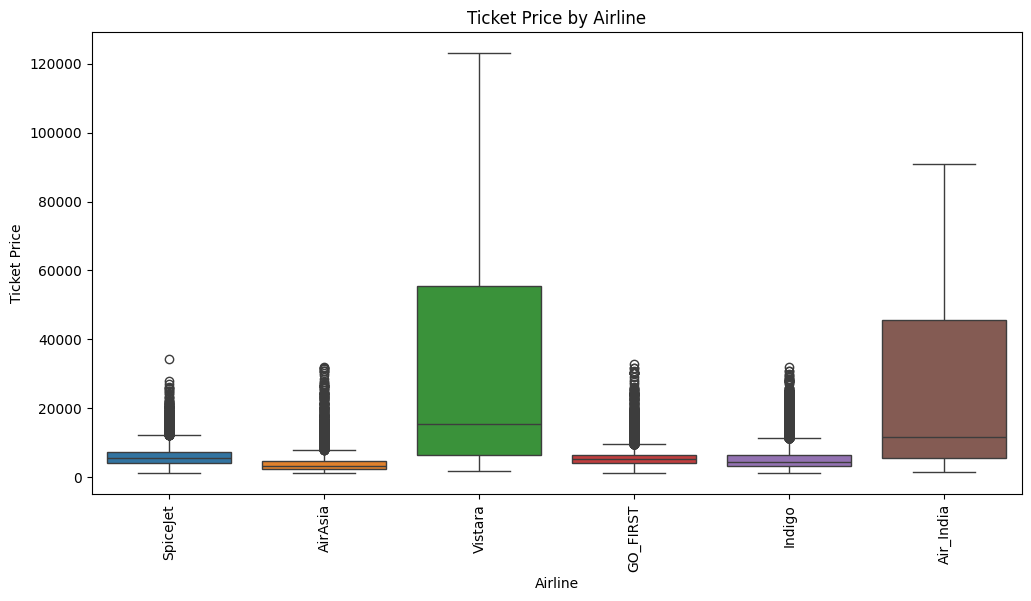

In [15]:
#Ticket pricing varies as per the brands of flights established
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['airline'], y=df['price'], hue=df['airline'], legend=False)
plt.xticks(rotation=90)
plt.title("Ticket Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Ticket Price")
plt.show()


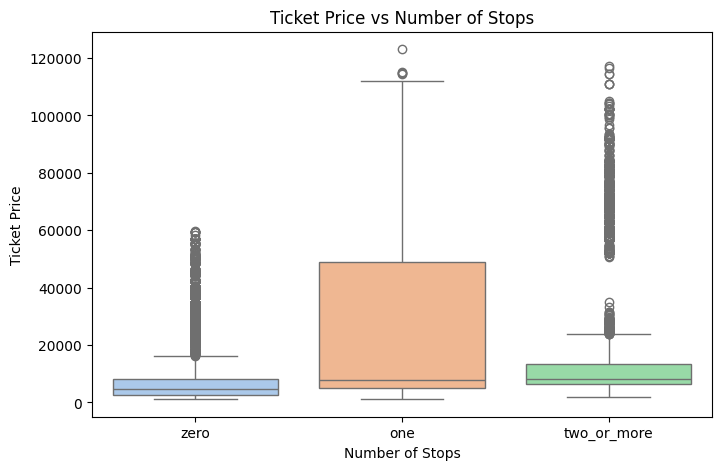

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['stops'], y=df['price'], hue=df['stops'], legend=False, palette="pastel")
plt.title("Ticket Price vs Number of Stops")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

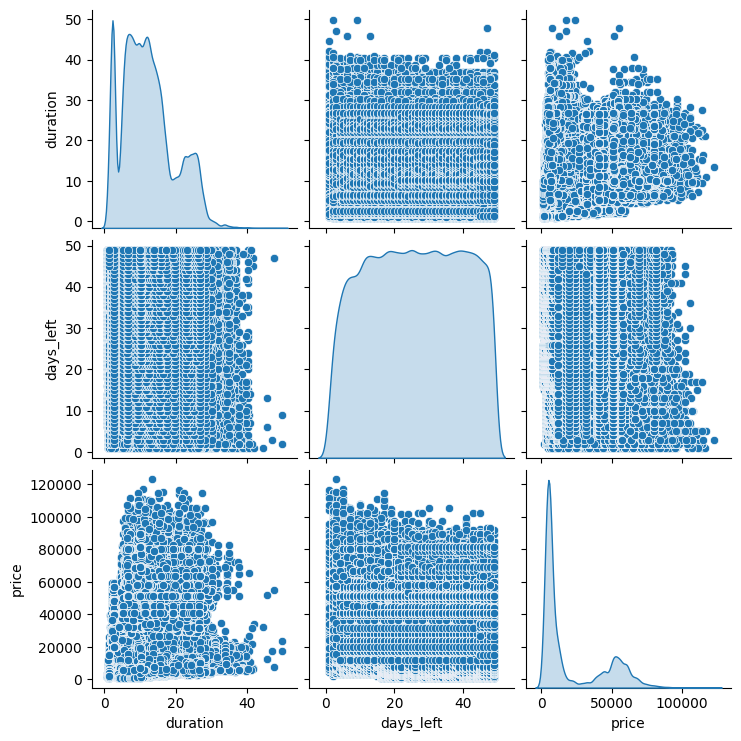

In [17]:
sns.pairplot(df[['duration', 'days_left', 'price']], diag_kind='kde')
plt.show()


**Conclusion**

1. The primary determinant of ticket price is booking time—prices increase as the departure date approaches.
2. Economy class dominates the market, with business class having fewer passengers.
3. Short-duration flights are more common, likely due to direct routes or short-haul trips.
4. The pricing strategy varies by airline, but demand-driven fluctuations are evident.
5. Travelers can save money by booking well in advance and choosing budget airlines.